In [4]:
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns; sns.set_style("white")
import umap.plot
%matplotlib inline
os.getcwd()

'/Users/chririn/Documents/Code'

In [5]:
BaseDir = "./2D_analysis_v2/results/"


In [6]:
# Import feature data after QC
selected_df = pd.read_csv("{}colopaint44_selected_data_notMAD.csv".format(BaseDir), sep=";", index_col=0)
ListOfMetadata = list(selected_df.columns[selected_df.columns.str.contains("Metadata_")])
selected_df.head(1)
df_toplot = selected_df

In [7]:
training_data = df_toplot.drop(ListOfMetadata, axis=1).to_numpy()

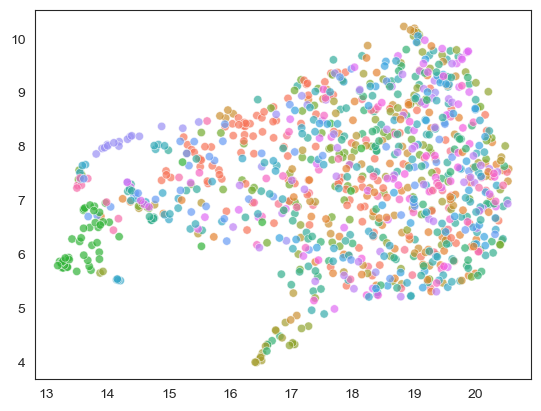

In [8]:
## UMAP

reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist= 0.1, random_state=42)
embedding = reducer.fit_transform(training_data)

fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_toplot.Metadata_moa,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    legend=False
    )

In [9]:

subsetDf = df_toplot[df_toplot['Metadata_cmpd_conc'] != 0.00833]
subsetDf = subsetDf[subsetDf['Metadata_cmpd_conc'] != 0.03330] # Remove lowest concentrations
training_data_subset = subsetDf.drop(ListOfMetadata, axis=1).to_numpy()


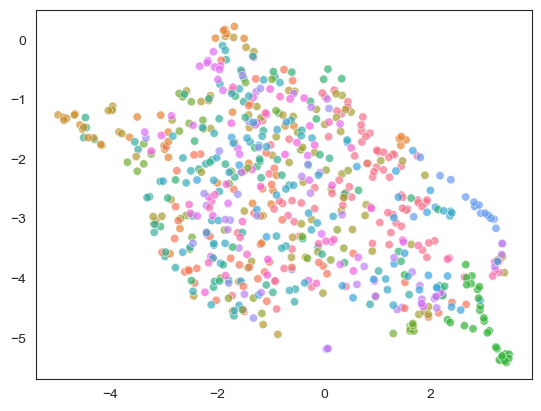

In [11]:
## UMAP

reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist= 0.1, random_state=42)
embedding = reducer.fit_transform(training_data_subset)

fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=subsetDf.Metadata_moa,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    legend=False
    )